In [4]:
# Import Libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os

In [5]:
# Create a Path
path = r'/Users/wiltonngo/InstaCart Basket Analysis'

In [6]:
# import orders_products_combined
ords_prods_merged = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'ord_prods_merged.pkl'))

In [7]:
ords_prods_merged.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,Busiest Day,Busiest Period of Day,max_order,loyatly_flags,avg_price,spending_flag,Meidan_Freq,order_freq_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,both,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non Frequent Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non Frequent Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non Frequent Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Mid-range product,Slowest Days,Average orders,10,New customer,6.367797,Low spender,20.5,Non Frequent Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Mid-range product,Slowest Days,Most orders,10,New customer,6.367797,Low spender,20.5,Non Frequent Customer


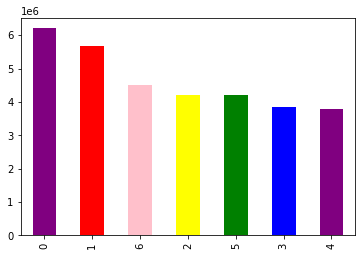

In [11]:
# Creating Bar Chart
bar =ords_prods_merged['order_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','yellow','green','blue'])

In [12]:
# Exporting Bar Chart
bar.figure.savefig(os.path.join(path,'Analysis','Visualizations','bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

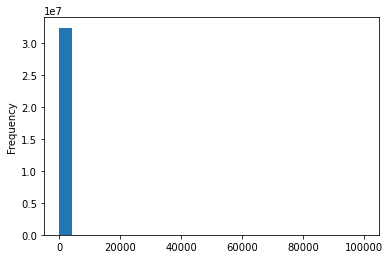

In [13]:
# Creating Histograms
ords_prods_merged['prices'].plot.hist(bins=25)

In [14]:
ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [15]:
ords_prods_merged['prices'].mean()

11.980225638467232

In [16]:
ords_prods_merged['prices'].median()

7.4

In [17]:
ords_prods_merged['prices'].max()

99999.0

### While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data

# ScatterPlot

In [ ]:
# Create a ScatterPlot to explore the realtionship bewteen two variables

<AxesSubplot:xlabel='prices', ylabel='prices'>

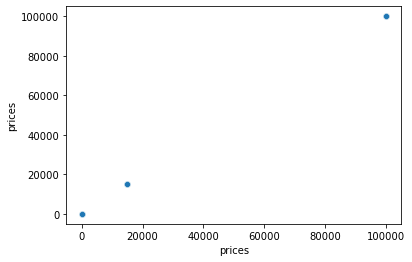

In [18]:
sns.scatterplot(x= 'prices', y = 'prices', data = ords_prods_merged)

In [19]:
# Let’s first determine whether there are any values above a certain threshold in your data, for instance, anything above the “normal” price of a supermarket item. 
ords_prods_merged.loc[ords_prods_merged['prices']>100]

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,price_range_loc,Busiest Day,Busiest Period of Day,max_order,loyatly_flags,avg_price,spending_flag,Meidan_Freq,order_freq_flag
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent Customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular Customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular Customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,both,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non Frequent Customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent Customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,both,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent Customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest Days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent Customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,both,High-range product,Slowest Days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular Customer


In [20]:
# Lets mark the prices above 100 as missing values
ords_prods_merged.loc[ords_prods_merged['prices']>100, 'prices'] = np.nan

In [22]:
ords_prods_merged['prices'].max()

25.0

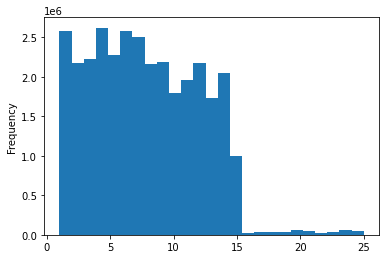

In [23]:
hist = ords_prods_merged['prices'].plot.hist(bins = 25)

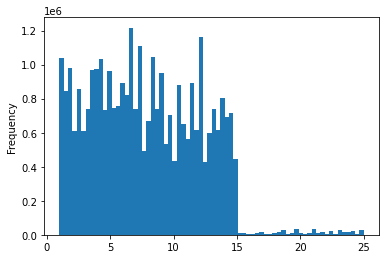

In [24]:
hist_2 = ords_prods_merged['prices'].plot.hist(bins = 70)

# Create Line Charts

In [27]:
df = ords_prods_merged[:2000000]

In [28]:
# Create a list holding True/False Values to the test np.random.rant() <= .7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merged)) <= 0.7

In [29]:
# Store 70% of the sample in the dataframe big
big = ords_prods_merged[dev]
# Store 30 % of the sample in the dataframe small
small = ords_prods_merged[~dev]

In [30]:
len(ords_prods_merged)

32404859

In [31]:
len(big) + len(small)

32404859

In [33]:
df_2 = small[['order_day_of_week','prices']]

KeyboardInterrupt: 

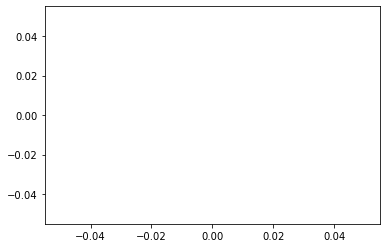

In [34]:
line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')